In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

- Seasonal variation, or seasonality, are cycles that repeat regularly over time.
- 
A repeating pattern within each year is known as seasonal variation, although the term is applied more generally to repeating patterns within any fixed period.
- A cycle structure in a time series may or may not be seasonal. If it consistently repeats at
the same frequency, it is seasonal, otherwise it is not seasonal and is called a cycle.

Types of seasonality:
- Time of Day.
- Daily.
- Weekly.
- Monthly.
- Quarterly.
- Year.

The simplest approach to determining if there is an aspect of seasonality is to plot and review your data, perhaps at different scales and with the addition of trend lines.

- The model of seasonality can be removed from the time series. 
- This process is called Seasonal Adjustment, or Deseasonalizing. 
- A time series where the seasonal component has been removed is called seasonal stationary. 
- A time series with a clear seasonal component is referred to as non-stationary.

# Seasonal Adjustment with Differencing

-  If there is a seasonal component at the level of one week, then we can remove it on an observation today by subtracting the value from last week

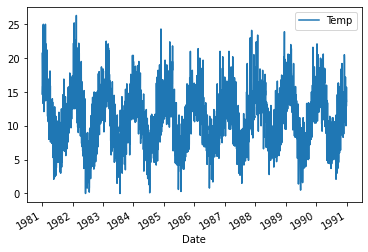

In [15]:
df1 = pd.read_csv('../Data/daily-minimum-temperatures.csv', index_col=0,
    parse_dates=True)
df1.head()
# index_col is 0 instead of None (take first column as index by default
df1.plot();

In [13]:
df = pd.read_csv('../Data/daily-minimum-temperatures.csv', header=0, index_col=0,
    parse_dates=True, squeeze=True)
df.head()

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64

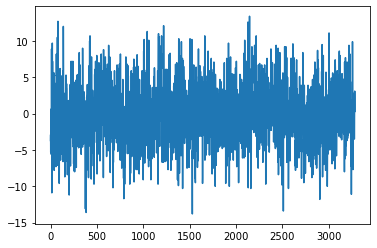

In [16]:
X=df.values
diff=list()
days_in_year=365
for i in range(days_in_year, len(X)):
    value=X[i]-X[i-days_in_year] #I take difference wuit respect to 365 days.
    diff.append(value)
    
plt.plot(diff)


 The complete list of leap years in the first half of the 21st century is therefore 2000, 2004, 2008, 2012, 2016, 2020, 2024, 2028, 2032, 2036, 2040, 2044, and 2048.
 
- There are two leap years in our dataset (1984 and 1988). They are not explicitly handled; this means that observations in March 1984 onwards the offset are wrong by one day, and after March 1988, the offsets are wrong by two days.
- One option is to update the code example to be leap-day aware.


In [18]:
df1.head()

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8


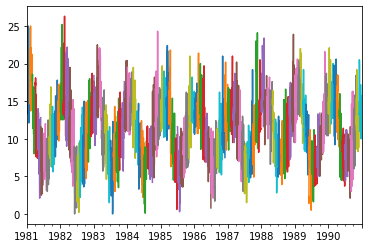

In [22]:
resample=df1['Temp'].resample('M')
resample.plot();


In [24]:
monthly_mean = resample.mean()

In [25]:
monthly_mean

Date
1981-01-31    17.712903
1981-02-28    17.678571
1981-03-31    13.500000
1981-04-30    12.356667
1981-05-31     9.490323
                ...    
1990-08-31     7.825806
1990-09-30     9.166667
1990-10-31    11.345161
1990-11-30    12.656667
1990-12-31    14.367742
Freq: M, Name: Temp, Length: 120, dtype: float64

<AxesSubplot:xlabel='Date'>

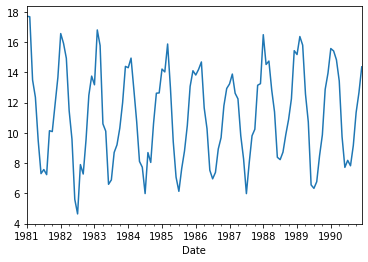

In [26]:
monthly_mean.plot()

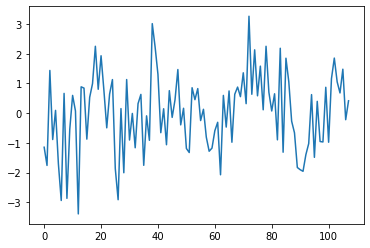

In [28]:
X=df.values
diff=list()
month_in_year=12
for i in range(month_in_year, len(monthly_mean)):
    value=monthly_mean[i]-monthly_mean[i-month_in_year] #I take difference wuit respect to 365 days.
    diff.append(value)

plt.plot(diff);

Running the example creates a new seasonally adjusted monthly minimum temperature dataset, skipping the first year of data in order to create the adjustment. The adjusted dataset is then plotted.

In [31]:
str(df.index[i].year-1)+'-'+str(df.index[i].month)

'1980-4'

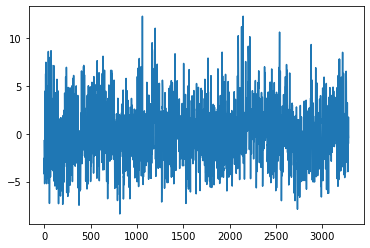

In [36]:
X=df.values
diff=list()
days_in_year=365
for i in range(days_in_year, len(X)):
    month_str=str(df.index[i].year-1)+'-'+str(df.index[i].month)
    month_mean_last_year=df[month_str].mean()
    value=X[i]-month_mean_last_year
    diff.append(value)
plt.plot(diff);

- We can use the monthly average minimum temperatures from the same month in the previous year to adjust the daily minimum temperature dataset. 
- Again, we just skip the first year of data, but the correction using the monthly rather than the daily data may be a more stable approach.
- This example is robust to daily fluctuations in the previous year and to offset errors creeping in due to February 29 days in leap years.

# Seasonal Adjustment with Modelling

- We can model the seasonal component directly, then subtract it from the observations.

In [39]:
X=[i%365 for i in range(0,len(df))]
X


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


In [40]:
y=df.values

In [42]:
degree=4
coef=np.polyfit(X,y,degree)

coef

array([-1.17308000e-08,  9.30253946e-06, -2.15977594e-03,  1.19147966e-01,
        1.38980178e+01])

In [43]:
print('Coefficients: %s' % coef)

Coefficients: [-1.17308000e-08  9.30253946e-06 -2.15977594e-03  1.19147966e-01
  1.38980178e+01]


In [45]:
curve=list()
for i in range(len(X)):
    value = coef[-1]
    for d in range(degree):
         value +=X[i]**(degree-d)*coef[d]
    curve.append(value)

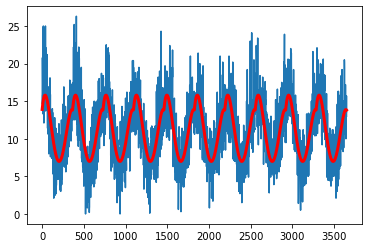

In [50]:
plt.plot(df.values);
plt.plot(curve,color='red', linewidth=3);
plt.show()

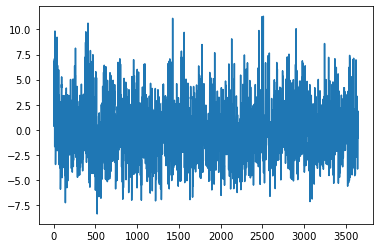

In [51]:
# create the seasonally adjusted
values=df.values
diff=list()
for i in range(len(values)):
    value = values[i]-curve[i]
    diff.append(value)

plt.plot(diff)
            